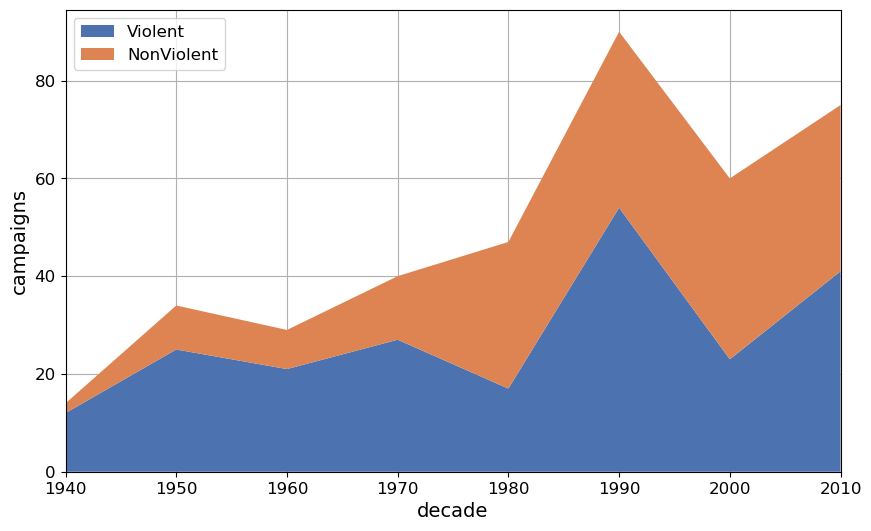

In [11]:
#questionnaire 1
#part1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#so that we can read the whole dataframe
pd.set_option('display.max_columns', None)

#read the data
dataframe = pd.read_csv('assignment_2023_2/NAVCO 1.2 Updated.tab',delimiter='\t')

#first filter out the empty rows where NAVCOID is Nan
dataframe = dataframe[dataframe['NAVCOID'].notna()]

#remove the '.0' from the floats and convert them to datetime so that we can process them further
dataframe['EYEAR'] = pd.to_datetime(dataframe['EYEAR'].astype(int).astype(str), format='%Y')

#first we have to find the end decade for each campaign
dataframe['DECADE'] = dataframe['EYEAR'].dt.year // 10 * 10

#now we have to group by Decade and whether or not the campaign was violent and at the same time keep only those 2, instead of the whole dataframe
grouped = dataframe.groupby(['DECADE', 'VIOL']).size().reset_index(name='Count')

#pivot so that our data is more readable and ready to be processed
pivoted_df = grouped.pivot(index='DECADE', columns='VIOL', values='Count').reset_index()

#rename columns
pivoted_df.columns = ['DECADE', 'NonViolent', 'Violent']

#create a stacked area plot
plt.figure(figsize=(10, 6))

#set the hex colors
#to get the perfect colors, open the svg file, iterate down and read its xml style fill elements ;)
hex_colors = ['#4c72b0', '#dd8452']

plt.stackplot(pivoted_df['DECADE'], pivoted_df['Violent'], pivoted_df['NonViolent'], labels=['Violent', 'NonViolent'], colors= hex_colors, zorder = 2)
plt.xlim(pivoted_df['DECADE'].iloc[0], pivoted_df['DECADE'].iloc[-1])

#customize the plot
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.legend(loc='upper left')

#use zorder to remove gridlines from the stacked area
plt.grid(True, zorder= 1)

#show the plot
plt.show()

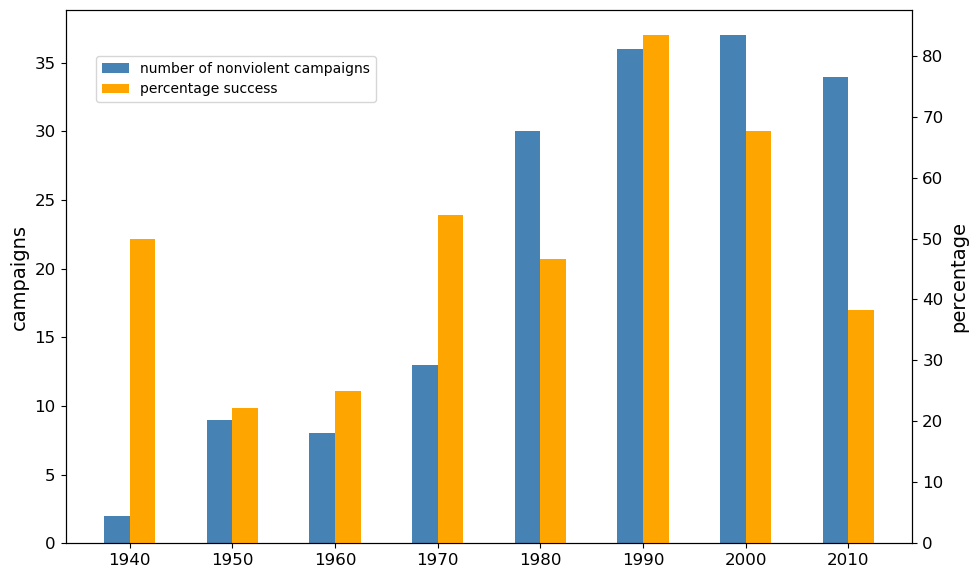

In [13]:
#questionnaire 1
#part2

#find the number of campaigns per decade
grouped1 = dataframe.groupby('DECADE').size().reset_index(name='Number_of_Campaigns')

#find the number of nonviolent campaigns per decade
grouped1['Non_Violent'] = dataframe[dataframe['VIOL'] == 0.0].groupby('DECADE').size().values

#find the number of nonviolent campaigns per decaded that managed to succeed
grouped2 = dataframe[((dataframe['VIOL'] == 0.0) & (dataframe['SUCCESS'] == 1.0))].groupby('DECADE').size().reset_index(name = 'a')

#append them to the dataframe
grouped1['Successful_Non_Violent'] = grouped2['a']

#find the percentage of succesful non violent campaigns and append them
grouped1['Percentage_of_Successful_NonViolent'] = (grouped1['Successful_Non_Violent'] / grouped1['Non_Violent']) * 100

#set up the figure and axes
fig, ax1 = plt.subplots(figsize = (10,6))

#edit the font sizes
plt.rcParams.update({
    'font.size': 14,           # Controls default text sizes
    'axes.labelsize': 14,      # Font size of x and y-axis labels
    'axes.titlesize': 16,      # Font size of the title
    'xtick.labelsize': 12,     # Font size of x-axis tick labels
    'ytick.labelsize': 12,     # Font size of y-axis tick labels
    'legend.fontsize': 12,     # Font size of the legend
    'figure.titlesize': 18     # Font size of the figure title
})


#plot the count of non-violent campaigns
bar_width = 2.5  
bar1 = ax1.bar(grouped1['DECADE'], grouped1['Non_Violent'], width=bar_width, color='#4682b4', label='number of nonviolent campaigns')
ax1.set_ylabel('campaigns', color='black')
ax1.tick_params('y', colors='black')

#create a second y-axis for the percentage of successful non-violent campaigns
ax2 = ax1.twinx()
bar2 = ax2.bar(grouped1['DECADE'] + bar_width, grouped1['Percentage_of_Successful_NonViolent'], width=bar_width, color='#ffa500', label='percentage success')
ax2.set_ylabel('percentage', color='black')
ax2.tick_params('y', colors='black')

#set tight layout
fig.tight_layout()

#move the legend to the upper left side within the plot
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), prop={'size': 10})

#add labels for each group
decade_labels = grouped1['DECADE']
ax1.set_xticks(grouped1['DECADE'] + bar_width / 2)
ax1.set_xticklabels(decade_labels)

plt.show()

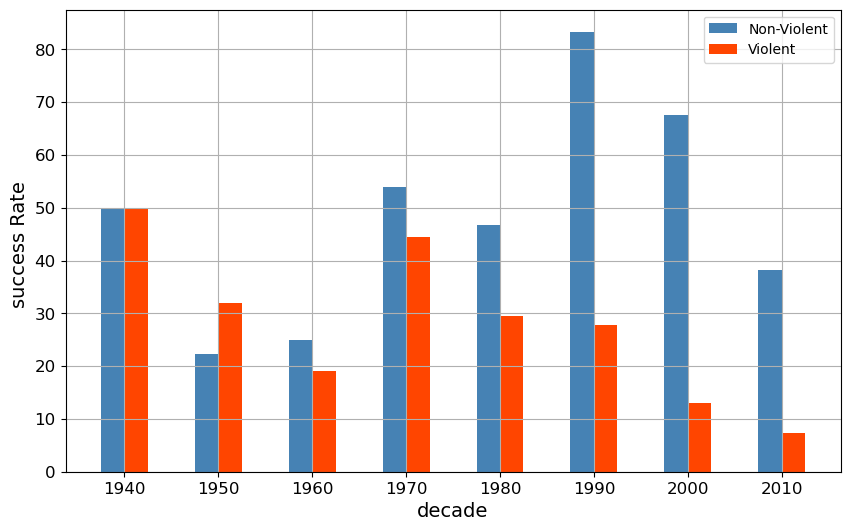

In [14]:
#questionnaire1
#part3

#now we have to add the number of violent campaigns
grouped1['Violent'] = grouped1['Number_of_Campaigns'] - grouped1['Non_Violent']

#find the number of succesful violent campaigns
variable = dataframe[((dataframe['VIOL'] == 1.0) & (dataframe['SUCCESS'] == 1.0))].groupby('DECADE').size().reset_index(name = 'a')

#append them to the dataframe
grouped1['Successful_Violent'] = variable['a']

#find the percentage of sucessful violent campaigns and append it to the dataframe
grouped1['Percentage_of_Successful_Violent'] = (grouped1['Successful_Violent'] / grouped1['Violent']) * 100

#set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

#plot the success rate of non-violent campaigns
bar_width = 2.5
bar1 = ax.bar(grouped1['DECADE'], grouped1['Percentage_of_Successful_NonViolent'], width=bar_width, color='#4682b4', label='Non-Violent')

#plot the success rate of violent campaigns
bar2 = ax.bar(grouped1['DECADE'] + bar_width, grouped1['Percentage_of_Successful_Violent'], width=bar_width, color='#ff4500', label='Violent')

#set labels
ax.set_xlabel('decade')
ax.set_ylabel('success Rate ')

#add legend in the upper right corner
plt.legend(loc='upper right', prop={'size': 10})

#add labels for each group
decade_labels = grouped1['DECADE']
ax.set_xticks(grouped1['DECADE'] + bar_width / 2)
ax.set_xticklabels(decade_labels)

#add grid lines
plt.grid(True)

#show the plot
plt.show()

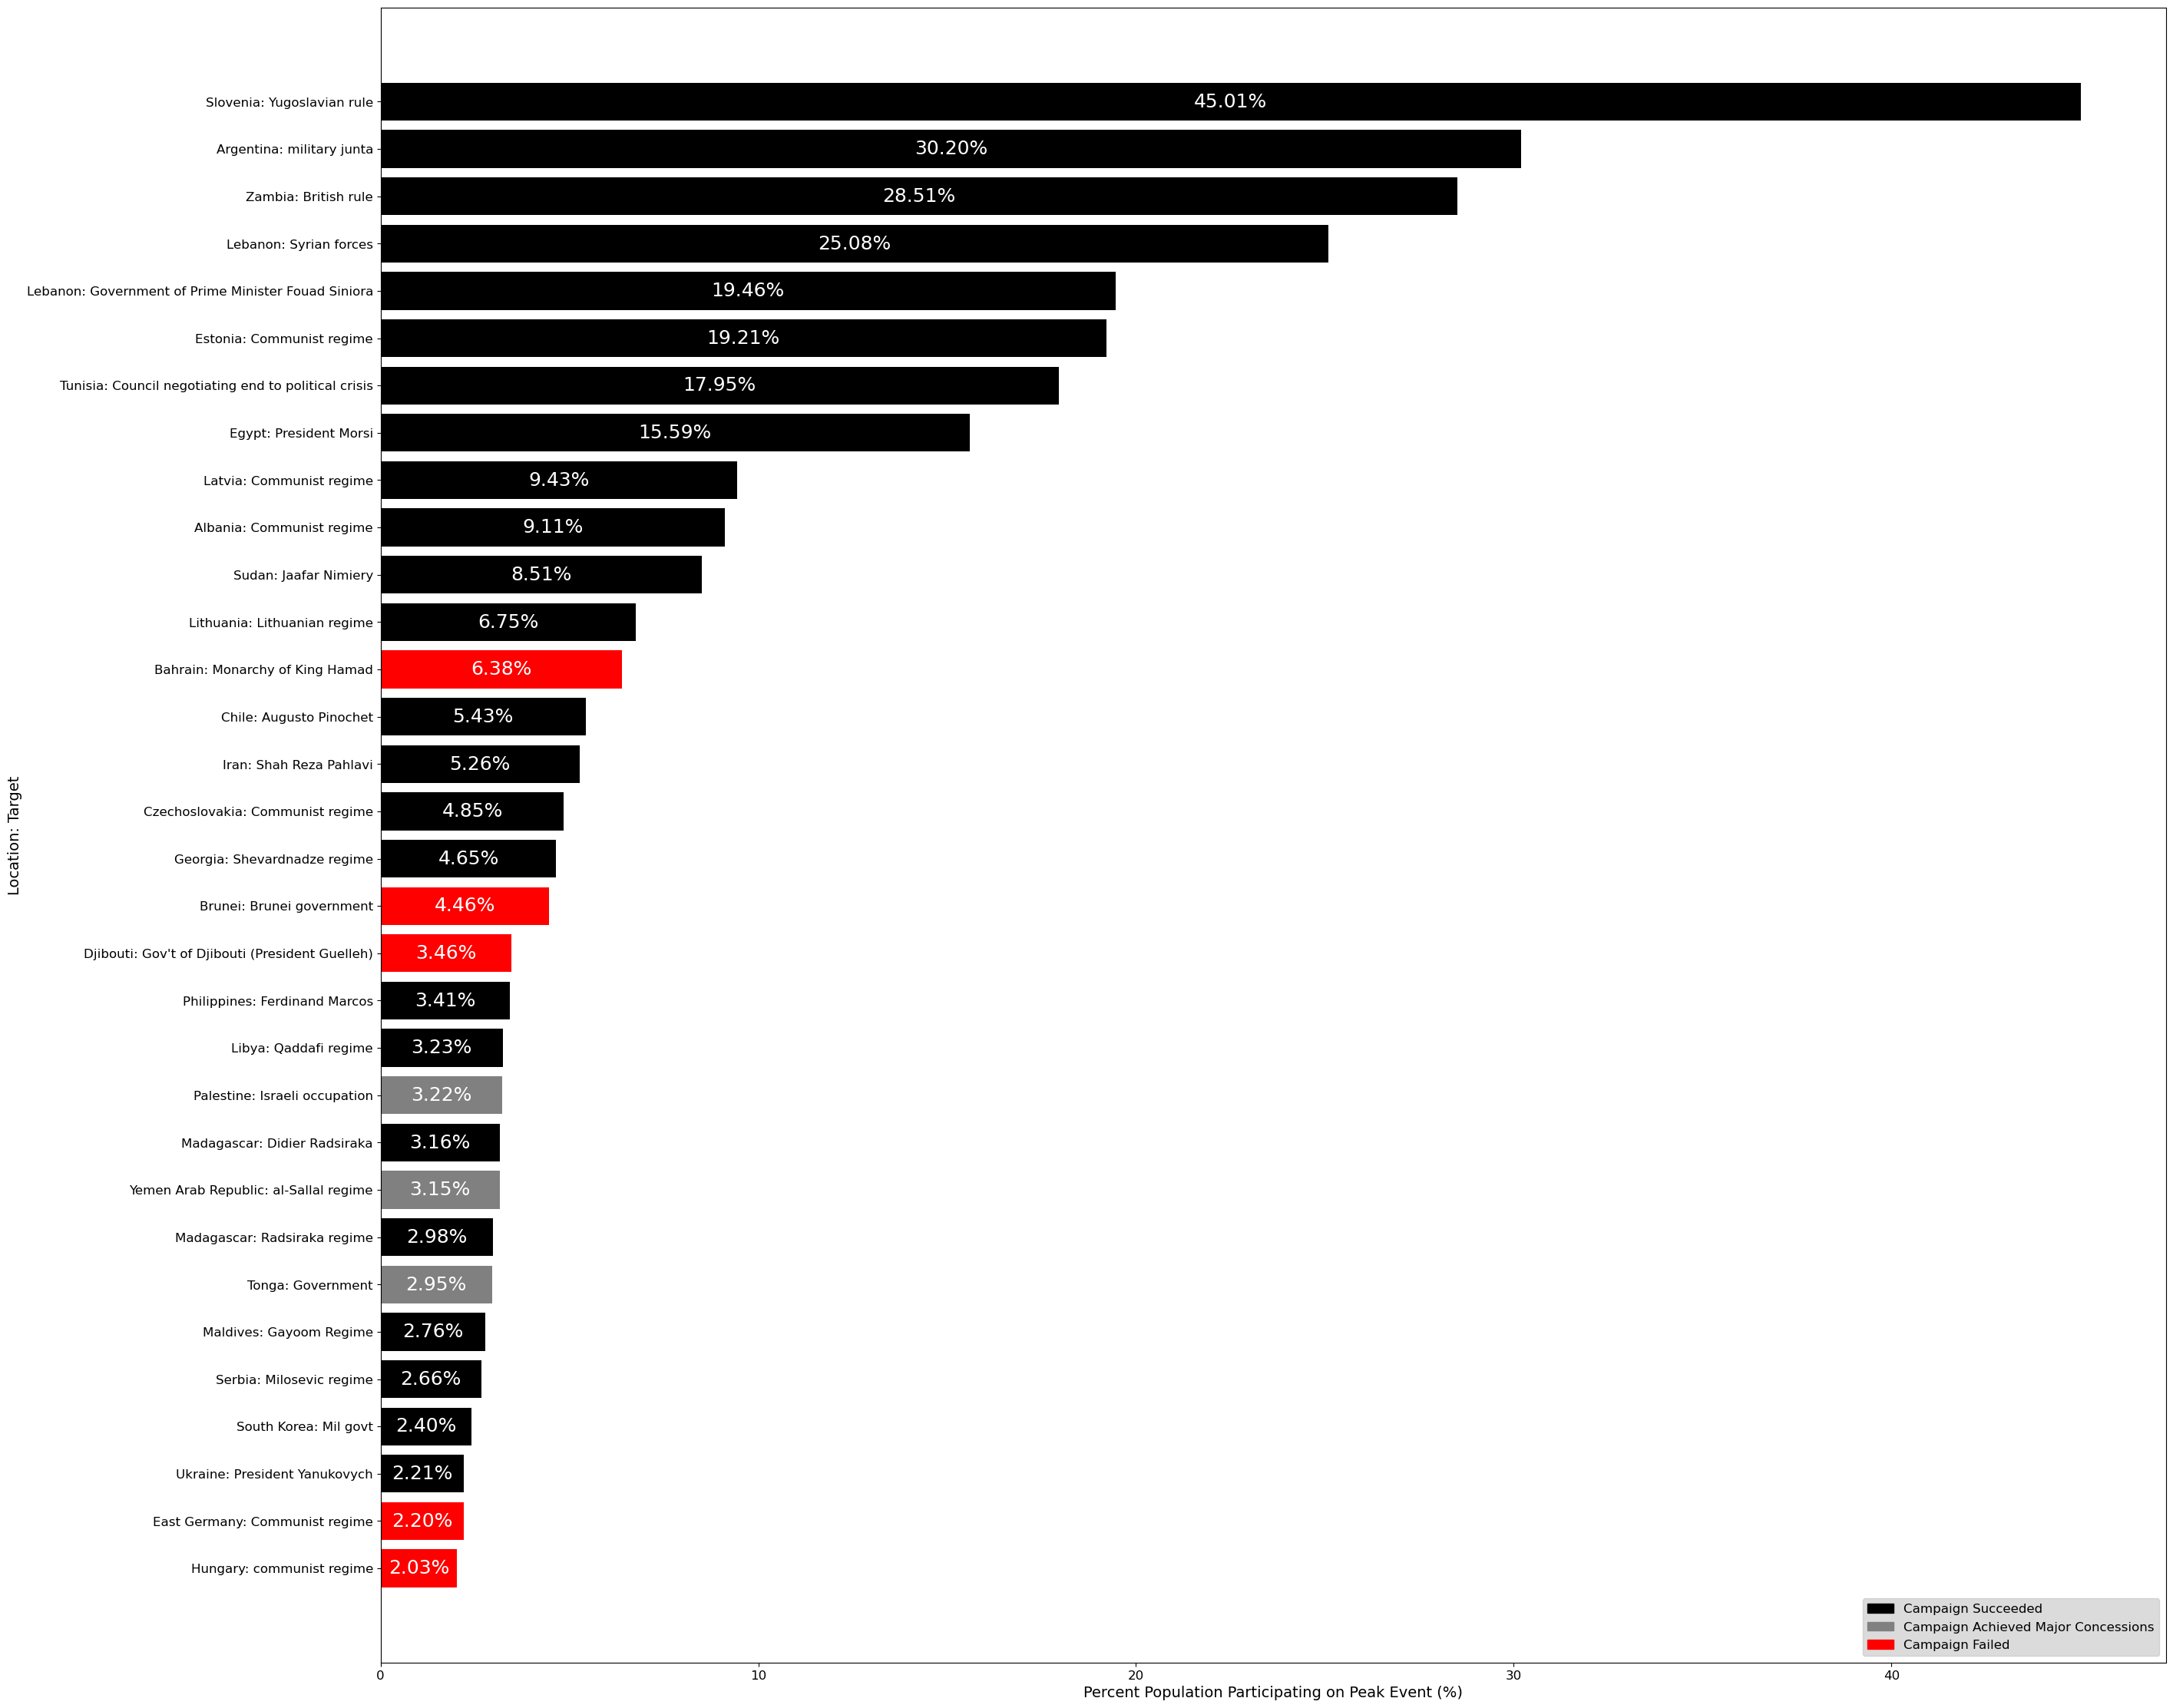

In [15]:
#questionnaire2
#create and sort dataframe2 by 'PERCENTAGEPOPULARPARTICIPATION' in descending order
dataframe2 = dataframe.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)

#keep only the values that are >2%
dataframe2 = dataframe2[dataframe2['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02]

#define colors 
colors = np.where((dataframe2['SUCCESS'] == 1.0),
                  'black', 
                  np.where((dataframe2['SUCCESS'] == 0.0) & (dataframe2['LIMITED'] == 1.0),
                           'grey', 'red'))

#create the  bar plot
fig, ax = plt.subplots(figsize=(30, 28))
bars = ax.barh(dataframe2['LOCATION'] + ': ' + dataframe2['TARGET'], dataframe2['PERCENTAGEPOPULARPARTICIPATION'] * 100, color=colors)

for bar, location_target, percentage in zip(bars, dataframe2['LOCATION'] + ': ' + dataframe2['TARGET'], dataframe2['PERCENTAGEPOPULARPARTICIPATION']):
    text_x = bar.get_x() + bar.get_width() / 2  # Adjust placement for better visibility
    ax.text(text_x, bar.get_y() + bar.get_height()/2, f'{percentage:.2%}', va='center', ha='center', color='white', fontsize=18)

#set labels
ax.set_xlabel('Percent Population Participating on Peak Event (%)')
ax.set_ylabel('Location: Target')

#add legend on the lower right side of the plot with larger font size
legend_labels = ['Campaign Succeeded', 'Campaign Achieved Major Concessions', 'Campaign Failed']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['black', 'grey', 'red']]
ax.legend(legend_handles, legend_labels, loc='lower right', facecolor='lightgrey')

#show the plot
plt.rcParams.update({'font.size': 22})
plt.show()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


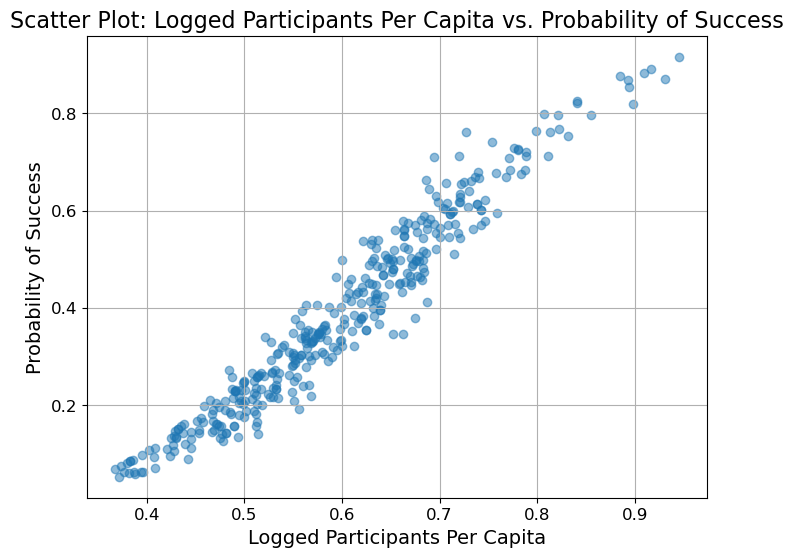

In [16]:
#questionnaire3
#part1
#import statsmodel that is needed for the regression models
import statsmodels.api as sm

#first we will find the population per capita, append it, and do the same for its logged version
dataframe['LOG_POPULATION'] = np.log(dataframe['PARTICIPATION'] / dataframe['PERCENTAGEPOPULARPARTICIPATION'])
dataframe['LOG_MEMBERSHIP'] = np.log(dataframe['PARTICIPATION'])
dataframe['MEMBERSHIP_PC'] = dataframe['LOG_MEMBERSHIP'] / dataframe['LOG_POPULATION']

#check for nulls
#print('NULLS ARE: ',dataframe['LOG_MEMBERSHIP'].isna().sum())
#found out some logs are null, so we have to drop them before contiuing
#create new dataframe for the regression model and remove the null values
regression_dataframe = dataframe.copy()
regression_dataframe = regression_dataframe.dropna(subset=['LOG_MEMBERSHIP'])
#print('NULLS ARE: ',regression_dataframe['LOG_MEMBERSHIP'].isna().sum())

#set the variables
x = regression_dataframe[['LOG_POPULATION', 'MEMBERSHIP_PC']]
x = sm.add_constant(x)
y = regression_dataframe['SUCCESS']



#create the model
model = sm.Logit(y, x)
result = model.fit()
#print(result.summary())

#create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(regression_dataframe['MEMBERSHIP_PC'], result.predict(x), alpha=0.5)
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Probability of Success')
plt.title('Scatter Plot: Logged Participants Per Capita vs. Probability of Success')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


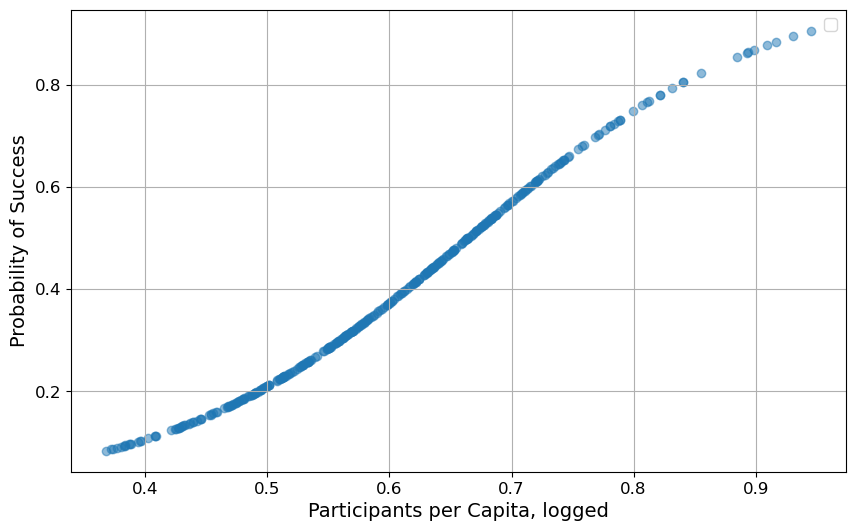

In [ ]:
#questionnaire3
#part2

#set the variables
x = regression_dataframe['MEMBERSHIP_PC']
x = sm.add_constant(x)
y = regression_dataframe['SUCCESS']

#create the model for membership per capita
model = sm.Logit(y, x)
result = model.fit()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(regression_dataframe['MEMBERSHIP_PC'], result.predict(x), alpha=0.5)


#set labels
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

#add grid lines
plt.grid(True)

#show the plot
plt.legend()
plt.show()

In [ ]:
#questionnaire3
#interpretation

print('\nWe can see that the first scatter plot approximately follows the y = x line, whereas the second one follows an S shaped curve. \n In the first case, we can see a bigger standard devation due to their being 2 variables, whereas in the second case we can see that our diagram is following the classic sigmoig logistic regression diagram. \n')

  Peak Popular Participation (%)  Observations Success Rate
6                         > 3.5%            18       88.89%
5                    1.0% - 3.5%            41       60.98%
4                   0.25% - 1.0%            92       45.65%
3                  0.06% - 0.25%            95       45.26%
2                 0.015% - 0.06%            66       24.24%
1               0.0035% - 0.015%            44        9.09%
0                      < 0.0035%            33       12.12%

We can see that Chenoweth came up with the "3.5% rule" result by observing the data.
Optimization terminated successfully.
         Current function value: 0.618980
         Iterations 5


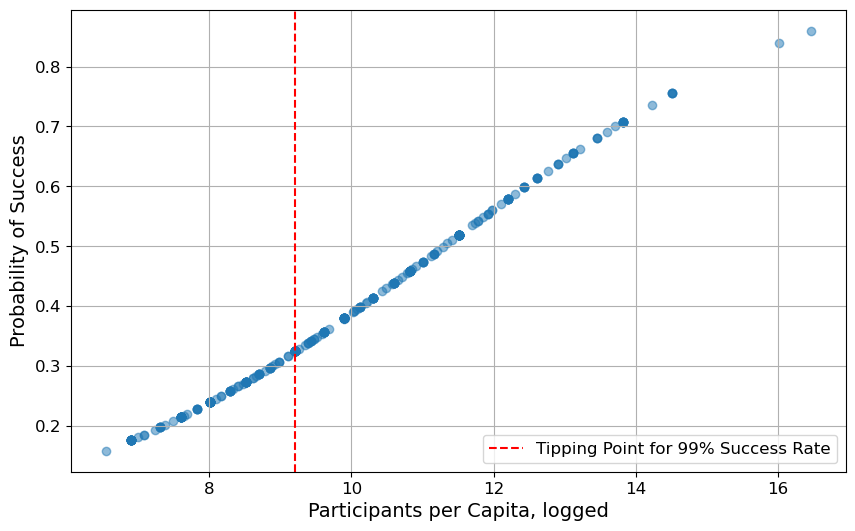

The tipping point for a 99% success rate is at logged population per capita: 9.21


In [17]:
#create a new dataframe to operate upon
dataframe3 = dataframe.copy()

#modify the percentage column
dataframe3['PERCENTAGEPOPULARPARTICIPATION'] *= 100

#define the ranges for the groupbys
bins = [0, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
labels = ['< 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', '> 3.5%']

#create a new column Percentage Group
dataframe3['Percentage Group'] = pd.cut(dataframe3['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels, right=False)

#group by percentage  and calculate observations and success rate
grouped_data = dataframe3.groupby('Percentage Group')['SUCCESS'].agg(['count', 'sum']).reset_index()
grouped_data['Success Rate'] = grouped_data['sum'] / grouped_data['count'] * 100

#rename columns
dataframe3 = grouped_data.rename(columns={'Percentage Group': 'Peak Popular Participation (%)', 'count': 'Observations'})
dataframe3['Success Rate'] = dataframe3['Success Rate'].map('{:.2f}%'.format)

#sort dataframe3 by 'Peak Popular Participation (%)' in descending order
dataframe3 = dataframe3.sort_values(by='Peak Popular Participation (%)', ascending=False)

#drop the sum column
dataframe3.drop(columns = 'sum',inplace=True)

print(dataframe3)
print('\nWe can see that Chenoweth came up with the "3.5% rule" result by observing the data.')

#set the variables
x = regression_dataframe['LOG_MEMBERSHIP']
x = sm.add_constant(x)
y = regression_dataframe['SUCCESS']

#create the logistic regression model for membership per capita
model = sm.Logit(y, x)
result = model.fit()

#calculate the predicted probabilities
predicted_probabilities = result.predict(x)

#find the tipping point for a 99% success rate
tipping_point_index = np.argmax(predicted_probabilities >= 0.99)
tipping_point_population = regression_dataframe.iloc[tipping_point_index]['LOG_MEMBERSHIP']

#create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(regression_dataframe['LOG_MEMBERSHIP'], predicted_probabilities, alpha=0.5)

#set labels
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

#add grid lines
plt.grid(True)

#highlight the tipping point
plt.axvline(tipping_point_population, color='red', linestyle='--', label='Tipping Point for 99% Success Rate')
plt.legend()

#show the plot
plt.show()

print(f"The tipping point for a 99% success rate is at logged population per capita: {tipping_point_population:.2f}")

In [ ]:
import math
'If we remove the log, the number for the tipping point for a 99% success rate is : ', math.e ** 9.21


('If we remove the log, the number for the tipping point for a 99% success rate is : ',
 9996.59685943787)